In [80]:
import os
cwd = os.getcwd()
if cwd[-9:] == 'NoteBooks' or cwd[-5:] == '/data':
    try:
        # Move up to root folder
        os.chdir("..")
        print("Directory changed")
    except OSError:
        print("Can't change the Current Working Directory") 
else:
    print("No need to change the Current Working Directory")

Directory changed


In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import json
import os
from pathlib import Path

import pandas as pd
import numpy as np

from compute_f import split_ts_seq, compute_step_positions
from io_f import read_data_file
from visualize_f import visualize_trajectory, visualize_heatmap, save_figure_to_html

floor_data_dir = './data/ilc2/data/site1/F1'
path_data_dir = floor_data_dir + '/path_data_files'
floor_plan_filename = floor_data_dir + '/floor_image.png'
floor_info_filename = floor_data_dir + '/floor_info.json'

save_dir = './data/ilc2/output/site1/F1'
path_image_save_dir = save_dir + '/path_images'
step_position_image_save_dir = save_dir
magn_image_save_dir = save_dir
wifi_image_save_dir = save_dir + '/wifi_images'
ibeacon_image_save_dir = save_dir + '/ibeacon_images'
wifi_count_image_save_dir = save_dir

In [86]:
Path(path_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(magn_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(wifi_image_save_dir).mkdir(parents=True, exist_ok=True)
Path(ibeacon_image_save_dir).mkdir(parents=True, exist_ok=True)

with open(floor_info_filename) as f:
    floor_info = json.load(f)
width_meter = floor_info["map_info"]["width"]
height_meter = floor_info["map_info"]["height"]

# Investigating a trace file

In [173]:
from tqdm.auto import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from integrations.ilc2 import get_input, json_points_to_array, collect_stats, get_filenames, collect_all, visualize

In [132]:
path_filenames = get_filenames(path_data_dir)[:10]
path_filenames

[PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd5ec5b77e0006b173da.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd649191710006b570f4.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd4ec5b77e0006b173ce.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd47c5b77e0006b173c8.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd669191710006b570f6.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9ef8dc5b77e0006b17359.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd60c5b77e0006b173dc.txt'),
 PosixPath('/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site1/F1/path_data_files/5dd9fd67c5b77e0006b173e4.txt'),
 PosixPath('/Users/romai

In [150]:
json_paths = collect_all(path_filenames)
json_paths

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


[{'file': '/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site2/F3/path_data_files/5dd398dc44333f00067aa447.txt',
  't0': 1574147666054.0,
  'tf': 1574147682469.0,
  'points': [{'r_id': 1,
    'x': 120.52162,
    'y': 139.45494,
    't': 1574147666054.0,
    't_id': 0,
    'r_type': 'bluetooth'},
   {'r_id': 2,
    'x': 109.64819,
    'y': 142.08673,
    't': 1574147673497.0,
    't_id': 0,
    'r_type': 'bluetooth'},
   {'r_id': 3,
    'x': 100.86071,
    'y': 137.58403,
    't': 1574147682469.0,
    't_id': 0,
    'r_type': 'bluetooth',
    'md': {'exit': 1}}]},
 {'file': '/Users/romainfouilland/code/cours/P3A/data/ilc2/data/site2/F3/path_data_files/5dd3904027889b0006b76afc.txt',
  't0': 1574145430204.0,
  'tf': 1574145443565.0,
  'points': [{'r_id': 4,
    'x': 34.35858,
    'y': 109.59855,
    't': 1574145430204.0,
    't_id': 1,
    'r_type': 'bluetooth'},
   {'r_id': 5,
    'x': 34.75637,
    'y': 112.17727,
    't': 1574145432355.0,
    't_id': 1,
    'r_type': 'bluetooth'

In [154]:
# Computing stats
stats = collect_stats(json_paths)
stats

  0%|          | 0/40 [00:00<?, ?it/s]

,filepath,nb_points,timestep_dev,timestep_avg,speed_dev,site,floor,path_id
0,/Users/romainfouilland/code/cours/P3A/data/ilc...,3,0.093147,8207.500000,0.154613,site2,F3,5dd398dc44333f00067aa447
1,/Users/romainfouilland/code/cours/P3A/data/ilc...,4,0.471605,4453.666667,0.152216,site2,F3,5dd3904027889b0006b76afc
2,/Users/romainfouilland/code/cours/P3A/data/ilc...,6,0.370455,6809.000000,0.234549,site2,F3,5dd3902627889b0006b76ae0
3,/Users/romainfouilland/code/cours/P3A/data/ilc...,3,0.002595,2890.500000,0.002595,site2,F3,5dd51866d48f840006f14965
4,/Users/romainfouilland/code/cours/P3A/data/ilc...,15,0.446366,4744.785714,0.300347,site2,F3,5dd3903644333f00067aa3a9
5,/Users/romainfouilland/code/cours/P3A/data/ilc...,7,0.537086,6769.166667,0.423084,site2,F3,5dd398db44333f00067aa445
6,/Users/romainfouilland/code/cours/P3A/data/ilc...,15,0.430960,5364.142857,0.237179,site2,F3,5dd398c544333f00067aa431
7,/Users/romainfouilland/code/cours/P3A/data/ilc...,8,0.303543,7197.142857,0.220490,site2,F3,5dd38fff44333f00067aa387
8,/Users/romainfouilland/code/cours/P3A/data/ilc...,6,0.240807,3264.200000,0.331353,site2,F3,5dd51bfd50e04e0006f5643e
9,/Users/romainfouilland/code/cours/P3A/data/ilc...,6,0.177206,5466.400000,0.104538,site2,F3,5dd38ffd27889b0006b76aca


In [155]:
from glob import glob

stats_dfs = []
for floor in tqdm(glob("./data/ilc2/data/*/*/")):
    path_filenames = get_filenames(floor + '/path_data_files')
    json_paths = collect_all(path_filenames)
    stats_dfs.append(collect_stats(json_paths))
stats = pd.concat(stats_dfs)

  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/27 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/45 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/44 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/70 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/33 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/67 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/99 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


  0%|          | 0/28 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/122 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/117 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/123 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/160 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading pa

  0%|          | 0/120 [00:00<?, ?it/s]

In [160]:
df = stats.sort_values(by='nb_points', ascending=False)
df.describe()

,nb_points,timestep_dev,timestep_avg,speed_dev
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,8.135160,0.350281,6791.917171,0.211422
std,5.219321,0.161983,8882.811037,0.116313
min,2.000000,0.000000,1969.000000,0.000000
25%,5.000000,0.270991,4538.102273,0.138943
50%,7.000000,0.362824,5545.312500,0.208280
75%,10.000000,0.447373,6659.972851,0.279304
max,38.000000,1.373810,144752.000000,0.731146


In [161]:
df.iloc[:50]

,filepath,nb_points,timestep_dev,timestep_avg,speed_dev,site,floor,path_id
22,/Users/romainfouilland/code/cours/P3A/data/ilc...,38,0.414830,5826.540541,0.301813,site2,F1,5dd35c9844333f00067aa0e0
133,/Users/romainfouilland/code/cours/P3A/data/ilc...,33,0.457242,7199.156250,0.239885,site1,B1,5dda14bf9191710006b57220
63,/Users/romainfouilland/code/cours/P3A/data/ilc...,31,0.379458,6472.966667,0.273660,site1,F1,5dd9e7ba9191710006b5705d
92,/Users/romainfouilland/code/cours/P3A/data/ilc...,29,0.323665,6396.214286,0.206240,site1,F3,5dda7437c5b77e0006b177f9
16,/Users/romainfouilland/code/cours/P3A/data/ilc...,29,0.446223,5143.035714,0.280036,site2,F2,5dd36ca744333f00067aa167
35,/Users/romainfouilland/code/cours/P3A/data/ilc...,29,0.636563,6019.428571,0.264210,site2,F1,5dd35c8d44333f00067aa0d8
63,/Users/romainfouilland/code/cours/P3A/data/ilc...,28,0.602617,4843.333333,0.203319,site1,F3,5dda74569191710006b574c6
49,/Users/romainfouilland/code/cours/P3A/data/ilc...,28,0.642930,4622.592593,0.286463,site2,F1,5dd35c7027889b0006b7684e
82,/Users/romainfouilland/code/cours/P3A/data/ilc...,27,0.379545,6575.576923,0.304621,site2,F1,5dd35c9527889b0006b76862
8,/Users/romainfouilland/code/cours/P3A/data/ilc...,27,0.486000,5787.769231,0.238200,site1,F2,5dda40219191710006b57384


array([[<AxesSubplot:title={'center':'nb_points'}>,
        <AxesSubplot:title={'center':'timestep_dev'}>],
       [<AxesSubplot:title={'center':'timestep_avg'}>,
        <AxesSubplot:title={'center':'speed_dev'}>]], dtype=object)

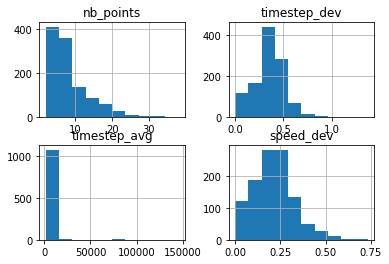

In [162]:
df.hist()

array([[<AxesSubplot:title={'center':'nb_points'}>,
        <AxesSubplot:title={'center':'timestep_dev'}>],
       [<AxesSubplot:title={'center':'timestep_avg'}>,
        <AxesSubplot:title={'center':'speed_dev'}>]], dtype=object)

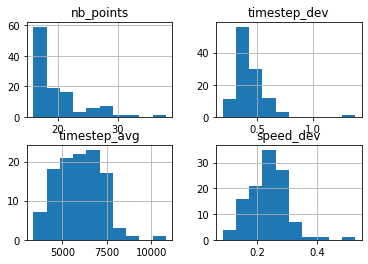

In [163]:
df[df['nb_points'] > 15].hist()

,filepath,nb_points,timestep_dev,timestep_avg,speed_dev,site,floor,path_id
63,/Users/romainfouilland/code/cours/P3A/data/ilc...,31,0.379458,6472.966667,0.273660,site1,F1,5dd9e7ba9191710006b5705d
92,/Users/romainfouilland/code/cours/P3A/data/ilc...,29,0.323665,6396.214286,0.206240,site1,F3,5dda7437c5b77e0006b177f9
82,/Users/romainfouilland/code/cours/P3A/data/ilc...,27,0.379545,6575.576923,0.304621,site2,F1,5dd35c9527889b0006b76862
7,/Users/romainfouilland/code/cours/P3A/data/ilc...,26,0.350311,5829.080000,0.259547,site1,F4,5ddb6f12c5b77e0006b1795b
50,/Users/romainfouilland/code/cours/P3A/data/ilc...,26,0.387547,6064.480000,0.220217,site1,F3,5dda74679191710006b574ca
55,/Users/romainfouilland/code/cours/P3A/data/ilc...,26,0.343336,6444.760000,0.296488,site1,F2,5dda51fb9191710006b573ad
101,/Users/romainfouilland/code/cours/P3A/data/ilc...,25,0.365268,4901.541667,0.267458,site1,F4,5ddb6573c5b77e0006b17932
37,/Users/romainfouilland/code/cours/P3A/data/ilc...,25,0.289456,5466.958333,0.248169,site2,F6,5dd4b79b44333f00067aaf54
77,/Users/romainfouilland/code/cours/P3A/data/ilc...,24,0.354299,6871.739130,0.218497,site2,F1,5dd35c7c44333f00067aa0ce
82,/Users/romainfouilland/code/cours/P3A/data/ilc...,23,0.340021,5431.227273,0.113890,site1,F3,5dda68bdc5b77e0006b177d9


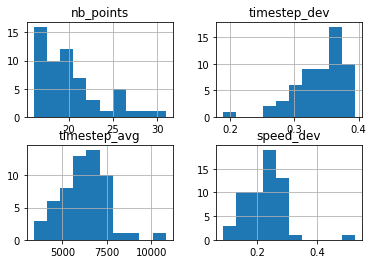

In [165]:
filtered_df = df[(df['nb_points'] > 15) & (df['timestep_dev'] < 0.4)]
filtered_df.hist()
filtered_df

In [168]:
filtered_df.groupby(['site', 'floor']).size()

site   floor
site1  B1        4
       F1        3
       F2       14
       F3        4
       F4        8
site2  B1        5
       F1        7
       F3        2
       F4        1
       F5        1
       F6        3
       F7        3
       F8        2
dtype: int64

,filepath,nb_points,timestep_dev,timestep_avg,speed_dev,site,floor,path_id
55,/Users/romainfouilland/code/cours/P3A/data/ilc...,26,0.343336,6444.760000,0.296488,site1,F2,5dda51fb9191710006b573ad
112,/Users/romainfouilland/code/cours/P3A/data/ilc...,21,0.367338,3948.400000,0.290142,site1,F2,5dda5b02c5b77e0006b17721
52,/Users/romainfouilland/code/cours/P3A/data/ilc...,21,0.314191,7513.850000,0.161998,site1,F2,5dda521e9191710006b573b9
24,/Users/romainfouilland/code/cours/P3A/data/ilc...,20,0.345963,7416.263158,0.226920,site1,F2,5dda5225c5b77e0006b176f3
40,/Users/romainfouilland/code/cours/P3A/data/ilc...,20,0.296872,8381.157895,0.269199,site1,F2,5dda5afcc5b77e0006b17719
44,/Users/romainfouilland/code/cours/P3A/data/ilc...,19,0.366539,7703.500000,0.170380,site1,F2,5dda5233c5b77e0006b176f7
117,/Users/romainfouilland/code/cours/P3A/data/ilc...,19,0.334540,5380.666667,0.288076,site1,F2,5dda5247c5b77e0006b176fb
57,/Users/romainfouilland/code/cours/P3A/data/ilc...,19,0.382478,7296.722222,0.199212,site1,F2,5dda040ac5b77e0006b1742a
87,/Users/romainfouilland/code/cours/P3A/data/ilc...,18,0.337274,5002.235294,0.256885,site1,F2,5dda5a8b9191710006b573da
2,/Users/romainfouilland/code/cours/P3A/data/ilc...,18,0.354103,6604.529412,0.227046,site1,F2,5dda5a99c5b77e0006b1770b


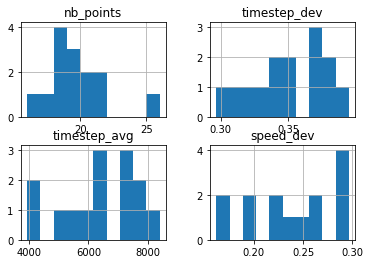

In [170]:
final_df = filtered_df[(filtered_df['site'] == 'site1') & (filtered_df['floor'] == 'F2')]
final_df.hist()
final_df

In [182]:
# Building figs
figs = []
for _, row in tqdm(final_df.iterrows()):
    figs.append(visualize(
        row['filepath'], floor_plan_filename, width_meter, height_meter, 
        show=False
    ))

0it [00:00, ?it/s]

Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.
Loading path -> done.


In [184]:
@interact(
    i=widgets.IntSlider(min=0, max=len(figs) - 1, step=1, value=5)
)
def show_path(i):
    figs[i].show()

interactive(children=(IntSlider(value=5, description='i', max=13), Output()), _dom_classes=('widget-interact',…

# Conclusion & question
## Pipeline
- We collect traces with ILC2 module **(done)**
- We convert them to a manageable format
    - 1. Convert them to .json path to be injected in the solution with the API integration **(done)**
    - 2. Convert them to .plt Geolife format (integrations/helper.py > to_plt) -> if we are willing to round all times to the closest second
- We compute stats
    - 1. Compute stats on them and store all of them in a stats file to be able to do easy filtering (just like Geolife with .plt -> stats -> filters -> loaded traces) -> can compute stats when we convert them and include them in the json -> better to build stats on json as this could be reused later (API json format) -> but OK to write them back in the json directly too **(computation done | storage left)**
    - 2. Directly leverage .plt filtering pipeline **(just implement filter functions)**
- We agregate traces
    - We need same site + floor + timestep_avg (to be used as dt unless we are willing to scale a bit -> change the speed to keep the same positions in the building)
    - Aggregate them to use the same t0 and same dt and max(tf)
    
## Data
- How should we decide on bluetooth / camera points and camera traces ? Traces are short so perhaps we can do only beginning and end as bluetooth and rest as camera points with no trace. But seems a bit hard.
- How to deal with non-periodic recording times?
- What do we want to prove with the experiments?
- Build an ICL2 object to collect initial data, build fig, stats, ... and also reconciliation function which will return the final API json data?